# e to the x... aka $e^x$

*kilroy caption*


### Friendly introduction


Early on we found examples of something unknown -- call it $X$ -- built into itself. 


As a first example Mister Halfway travels an infinite journey; so let's call that **J** for journey. 
This begins with an initial leg followed by... here it comes... the rest of the journey is a smaller version 
itself: **J** lives within **J**.


A second example: There is an infinite pattern of triangles built into the even-odd pattern of Meru Prastarah. 
As our view of the mountain (Mount Meru) gets larger and larger we see the basic pattern repeats larger 
and larger as well. 


Egon's painting on the town square has the pattern of triangles within itself. 


If all of this sounds familiar: Great. If it is unfamiliar: Check out 
the notebooks on **infinity**, **Monte Carlo** and **Meru Prastarah**.


The goal of *this* notebook is to explore a new function. I leave it to you to guess whether that 
function has some of this copy of itself inside itself or not. Our plan is to...


- name the new function (see the title)
- define what it is using infinity
- find that it is built into itself
- play with some code that allows us to see how the function works
- extend the idea to a new kind of number


Let's start with this word *function*. 


A function is a machine of sorts. You drop one or more things in... and you get one or more things out. The 
most familiar function is the addition function. You drop in two numbers $a$ and $b$ and you get a new number 
out, $a+b$.


Let's do another: Drop in some number and this time I'll call it $x$. Multiply $x$ by $3$ and add $4$.
No worries. This function produces the number $7$ when we drop in $1$ for $x$. We use $x$ to mean 'any number you like'
and so it is abstract. 


In school things can get confusing when they get abstract. I'm going to tell you something about abstraction 
that may or may not help: Learning to think abstractly is the heart and soul of mathematical thinking. 
Furthermore it is very useful to remember the following principle: 


> When something abstract is true: It must be true for anything definite.


This means that if I am having a hard time understanding something abstract (say using $x$) then I am
very happy to choose something definite to verify that it works. So I may say 'let's set $x$ equal to $0$
and see what happens.' In fact I may try out two or three or ten definite values for $x$ to try and see
how the abstract pattern works. 


Ok so now to the function 'e to the x'. What does this mean? Well it is obviously abstract and it looks 
like it has two numbers going in: $e$ and $x$. And it sounds like $x$ is an exponent of $e$. This is 
all correct. 


e to the x only has one 'anything you like' input, which is $x$. The $e$ part is already figured out. 
It is a definite number, like $\pi$. It is a *real* number and it is approximately $2.7$. What is 
peculiar about $e$ is that it is special. It is a little harder to find than $pi$ is; but there it is, 
a new number to put in your mathematical vocabulary called $e$. 


### Technical introduction


This page is source material for our eventual convergence on the Julia and Mandelbrot set construction. 



interactive(children=(IntSlider(value=0, continuous_update=False, description='tensDigit', max=9), IntSlider(v…

<function __main__.e_to_the_x(tensDigit, onesDigit, tenthsDigit, nFractions)>

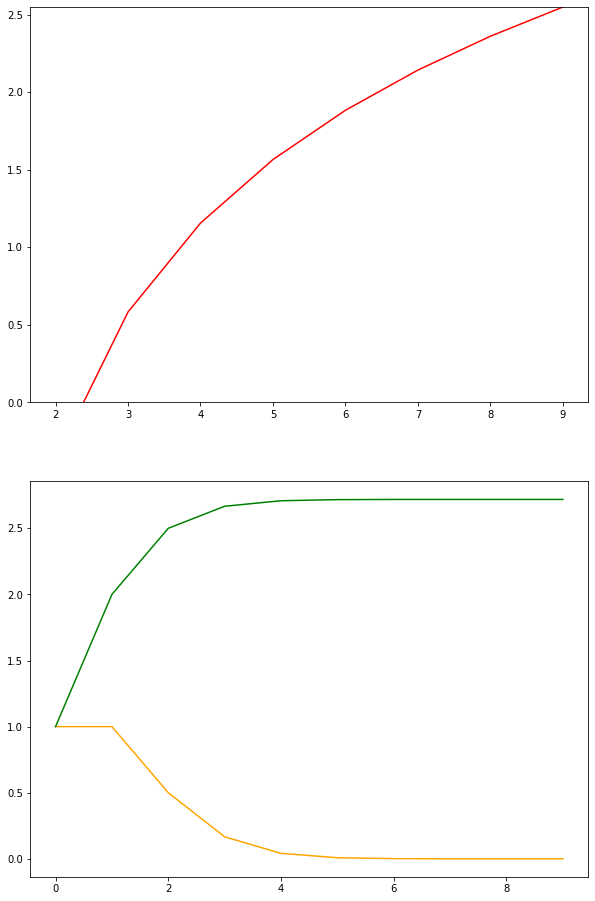

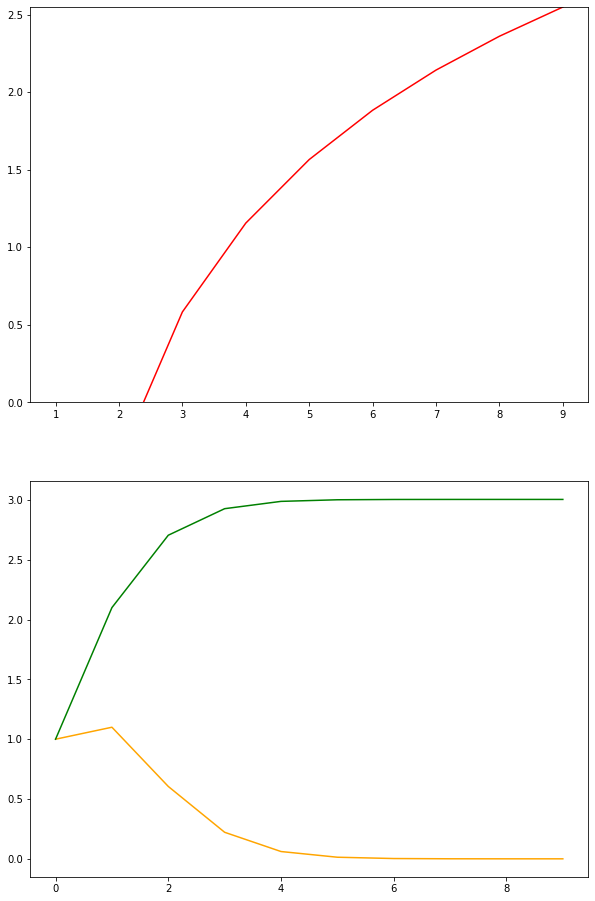

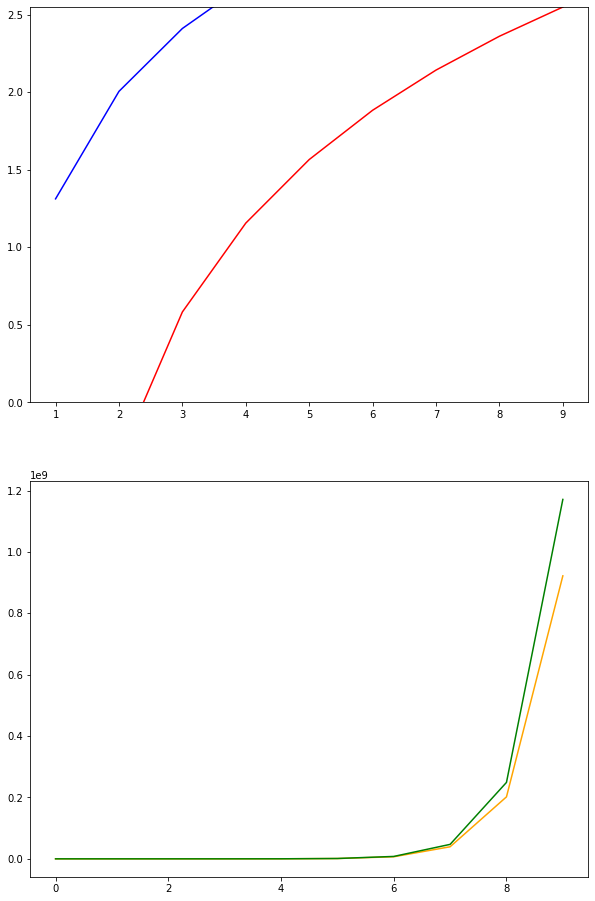

In [1]:
%matplotlib inline
import numpy as np
from ipywidgets import *
from traitlets import dlink
import matplotlib.pyplot as plt


def factorial(n):
    f = 1.
    if n == 0 or n == 1: return f
    for i in range(2, n+1):
        f*=i
    return f

def e_to_the_x(tensDigit, onesDigit, tenthsDigit, nFractions):
    top = []
    bottom = []
    fractions = []
    sums = []
    x = tensDigit * 10.0 + onesDigit + tenthsDigit/10.
    ex = 0
    for i in range(nFractions):
        numerator = np.power(x, i)
        denominator = factorial(i)
        ex += numerator/denominator
        top.append(numerator)
        bottom.append(denominator)
        fractions.append(numerator/denominator)
        sums.append(ex)
    print(x,ex)
    
    # plt.subplots returns a tuple: A general-context figure and a list of sub-plots assigned to axes
    fig, axes = plt.subplots(2, figsize=(10,16))
    axisTopBottom = axes[0]    
    axisFractions = axes[1]
    
    axisTopBottom.plot(np.log(np.log(top)), 'b')
    axisTopBottom.plot(np.log(np.log(bottom)), 'r')
    axisFractions.plot(fractions, 'orange')
    axisFractions.plot(sums, 'g')
    
    axisTopBottom.set(ylim=(0.0, np.log(np.log(bottom[-1]))))

    return 


# this sets up the controls: 2 sliders plus the checkbox
interact(e_to_the_x, \
         tensDigit=widgets.IntSlider(min=0,max=9,step=1,value=0,continuous_update=False),\
         onesDigit=widgets.IntSlider(min=0,max=9,step=1,value=1,continuous_update=False),\
         tenthsDigit=widgets.IntSlider(min=0,max=9,step=1,value=0,continuous_update=False),\
         nFractions=widgets.IntSlider(min=1,max=50,step=1,value=10,continuous_update=False)\
        )